In [ ]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 35.3 MB/s 
     |████████████████████████████████| 1.3 MB 53.9 MB/s 
     |████████████████████████████████| 5.5 MB 50.4 MB/s 
     |████████████████████████████████| 451 kB 63.1 MB/s 
     |████████████████████████████████| 1.6 MB 47.6 MB/s 
     |████████████████████████████████| 212 kB 72.8 MB/s 
     |████████████████████████████████| 182 kB 75.3 MB/s 
     |████████████████████████████████| 115 kB 28.2 MB/s 
     |████████████████████████████████| 127 kB 74.8 MB/s 
     |████████████████████████████████| 7.6 MB 60.9 MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *

In [ ]:
set_seed(123, True) # For Reproducible Results 
plots = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=Resize(1000),
    batch_tfms=aug_transforms(size=1000, p_affine=0.0, do_flip=False))

export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/plots')
dls = plots.dataloaders(export_path, bs=4) # Datablock and Dataloaders 

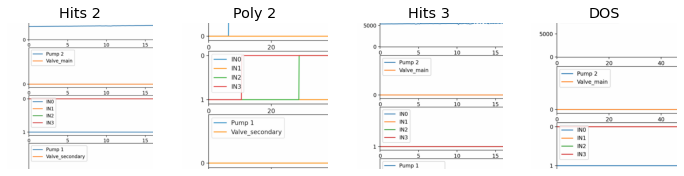

In [ ]:
dls.train.show_batch(nrows=1, ncols=4) # Training Batch Example 

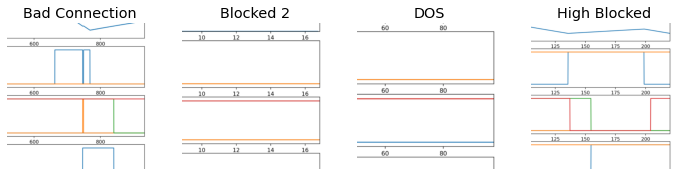

In [ ]:
dls.valid.show_batch(nrows=1, ncols=4) # Validation Batch Example 

In [ ]:
num_training = len(dls.train.items)
num_validation = len(dls.valid.items)

print(f'There are {num_training} images in the training set')
print(f'There are {num_validation} images in the validation set')

There are 16 images in the training set
There are 16 images in the validation set


In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy, lr=0.002) # Set up Learner (Manipulated Architecture and Learning Rate to Improve Accuracy Metric)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(4) # Train Learner (4 Epochs Selected)

epoch,train_loss,valid_loss,accuracy,time
0,0.321416,2.418462,0.562500,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.100232,2.244414,0.562500,00:03
1,0.092719,1.879570,0.625000,00:03
2,0.119119,2.126300,0.625000,00:03
3,0.173941,2.169223,0.625000,00:03


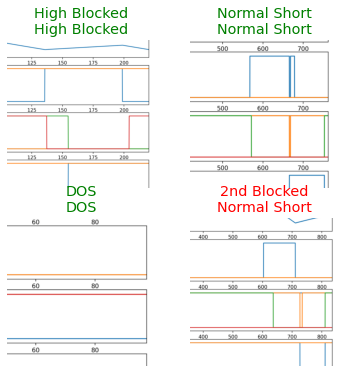

In [ ]:
learn.show_results()

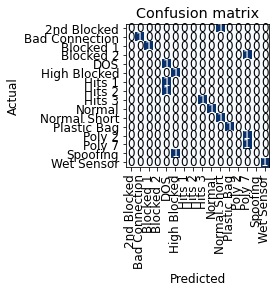

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()